Run this script to compute or plot the derivative coupling between polariton states $\Phi_3$ and $\Phi_2$ in the 1-molecule 1-photon system as a function of the photonic lifetime, $\gamma$.  

In [16]:
### Import all libraries and define various parameters here!
import numpy as np
from polaritonic import polaritonic
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

The following cell will actually compute the derivative coupling and write it to a file.  You can change the $\gamma$ parameter and the filename (via $prefix$) here!

In [19]:
ri_init = -0.66156
vi_init = 3.3375e-5
### lifetime
gamp = 100.000
gam_diss_np = gamp * 1e-3 / 27.211 

### photonic mode energy in eV
omp = 2.45
### convert to a.u.
omc = omp/27.211
### coupling strength in eV
gp = 0.02
gc = gp/27.211

au_to_ps = 2.4188e-17 * 1e12

### get prefix for data file names
prefix = "gam_100.0"
### filename to write nuclear trajectory to
nuc_traj_fn = "Data/" + prefix + '_nuc_traj.txt'
### filename to wrote PES to
pes_fn = "Data/" + prefix + '_pes.txt'
### filename to write electronic/polaritonic dynamics to
ed_fn = "Data/" + prefix + '_electronic.txt'
### filename to write photonic contributions of each state to
pc_fn = "Data/" + prefix + '_photon_contribution.txt'

### hellman-Feynman file 
hf_fn = "Data/" + prefix + "_hf.txt"


options = {
        'Number_of_Photons': 1,
        'Complex_Frequency': True,
        'Photon_Energys': [omc],
        'Coupling_Strengths': [gc], 
        'Photon_Lifetimes': [gam_diss_np],
        'Initial_Position': ri_init,
        'Initial_Velocity': vi_init,
        'Mass': 1009883,
        ### temperature in a.u.
        'Temperature': 0.00095,
        ### friction in a.u.
        'Friction': 0.000011,
        ### specify initial state as a human would, not a computer...
        ### i.e. 1 is the ground state... it will be shifted down by -1 so
        ### that it makes sense to the python index convention
        'Initial_Local_State': 3
        
        }

### instantiate
polt = polaritonic(options)
### write forces and derivative coupling
polt.Write_Forces(hf_fn)

print(polt.H_photonic)

[[0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.09003712-0.00183749j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.09003712-0.00183749j]]


Once the derivative coupling has been written to a file (or several have been written to a file), you can parse the files and plot them with the following cell!  

### Note the following cell as-written expects that you have 3 files computed already with the following prefixes from the cell above:
`gamp = 1.0` and `prefix = gam_1.0`

`gamp = 50.0` and `prefix = gam_50.0`

`gamp = 100.0` and `prefix = gam_100.0`

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


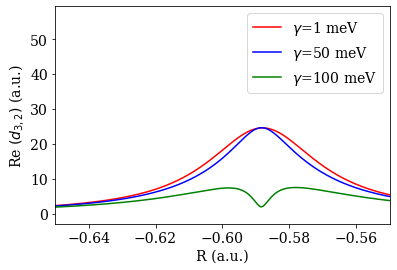

In [21]:
hf_1 = "Data/gam_1.0_hf.txt"
hf_50 = "Data/gam_50.0_hf.txt"
hf_100 = "Data/gam_100.0_hf.txt"


### read text file
dc_1 = np.loadtxt(hf_1,dtype=complex)
dc_50 = np.loadtxt(hf_50,dtype=complex)
dc_100 = np.loadtxt(hf_100,dtype=complex)




plt.plot(dc_1[:,0], np.abs(dc_1[:,3]), 'red', label='$\gamma$=1 meV')
plt.plot(dc_50[:,0], np.abs(dc_50[:,3]), 'blue', label='$\gamma$=50 meV')
plt.plot(dc_100[:,0], np.abs(dc_100[:,3]), 'green', label='$\gamma$=100 meV')
plt.legend()
plt.xlim(-.65,-.55)
#plt.ylim(-20.,20)
plt.xlabel("R (a.u.)")
plt.ylabel("Re $( d_{3,2} )$ (a.u.)")
plt.savefig("DC_abs.eps")
plt.show()

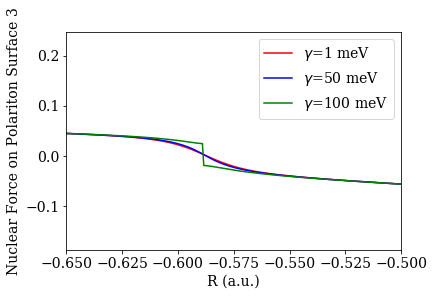

In [33]:

plt.plot(dc_1[:,0], np.real(dc_1[:,2]), 'red', label='$\gamma$=1 meV')
plt.plot(dc_50[:,0], np.real(dc_50[:,2]), 'blue', label='$\gamma$=50 meV')
plt.plot(dc_100[:,0], np.real(dc_100[:,2]), 'green', label='$\gamma$=100 meV')
plt.legend()
plt.xlim(-.65,-.50)
#plt.ylim(-20.,20)
plt.xlabel("R (a.u.)")
plt.ylabel("Nuclear Force on Polariton Surface 3")
#plt.savefig("DC.eps")
plt.show()

### Use this to check the Derivative Coupling method (no interesting output from this!)

In [ ]:
polt.R = -0.59
polt.H_e()
polt.H_total = np.copy(polt.H_electronic + polt.H_photonic + polt.H_interaction)
polt.Transform_L_to_P()
c2 = polt.transformation_vecs_L_to_P[:,1]
c2s = np.conj(c2)
c3 = polt.transformation_vecs_L_to_P[:,2]
V22 = polt.polariton_energies[1]
V33 = polt.polariton_energies[2]


polt.R = -0.59+polt.dr
polt.H_e()
polt.H_total = np.copy(polt.H_electronic + polt.H_photonic + polt.H_interaction)
Hf = np.copy(polt.H_total)
polt.R = -0.59-polt.dr
polt.H_e()
polt.H_total = np.copy(polt.H_electronic + polt.H_photonic + polt.H_interaction)

Hb = np.copy(polt.H_total)
Hp = np.copy((Hf-Hb)/(2*polt.dr))
t = np.dot(Hp, c3)
d23 = np.dot(c2s, t)
print(-d23/(V33-V22))
polt.R = -0.59
polt.Derivative_Coupling()
print(polt.dc[1,2])
#print(np.real(Hp))
#print(np.transpose(A))
#print(np.imag(polt.dc))
#print(np.imag(np.conj(polt.dc)))